In [1]:
import matplotlib.pyplot as plt
import json
import statistics
import pandas as pd
import seaborn as sns
import numpy as np

### Class Distributions

In [2]:
def plot_dist(df, class_, filename):
    dist = df['genus_name'].value_counts(normalize=True, sort=False)
    print('Max: ' + str(max(list(dist))), 'Min: ' + str(min(list(dist))), 'Avg: ' + str(statistics.mean(list(dist))))
    fig = plt.figure(figsize=(3.5, 2))
    ax = plt.axes()
    ax.set_facecolor('white')
    plt.bar(list(range(len(dist))), dist, width=1.5, color='gray')
    plt.xticks([])
    plt.yticks(fontsize=5)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(class_ + ' Species Distribution', fontsize=10, pad=20)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

Max: 0.4272965879265092 Min: 0.0005249343832020997 Avg: 0.029411764705882353


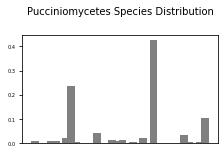

In [5]:
df = pd.read_csv('Pucciniomycetes.Cleaned.k1.csv')
df = df.rename(columns={'genus name': 'genus_name'})
plot_dist(df, 'Pucciniomycetes', 'pucci_dist_new')

Max: 0.08974358974358974 Min: 0.00017094017094017094 Avg: 0.0036231884057971015


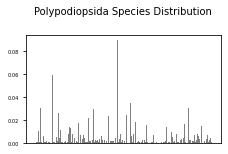

In [6]:
df = pd.read_csv('Polypodiopsida.Cleaned.k1.csv')
df = df.rename(columns={'genus name': 'genus_name'})
plot_dist(df, 'Polypodiopsida', 'polypod_dist_new')

Max: 0.20439653350243078 Min: 0.0002113718030014796 Avg: 0.00819672131147541


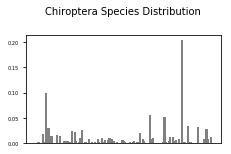

In [3]:
df = pd.read_csv('datasets/Chiroptera.Cleaned.k1.csv')
plot_dist(df, 'Chiroptera', 'chiroptera_dist_new')

Max: 0.10375034218450589 Min: 0.0002737476047084588 Avg: 0.007874015748031496


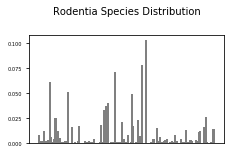

In [4]:
df = pd.read_csv('datasets/Rodentia.Cleaned.k1.csv')
plot_dist(df, 'Rodentia', 'rodentia_dist_new')

Max: 0.020038167938931296 Min: 0.00023854961832061068 Avg: 0.0011890606420927466


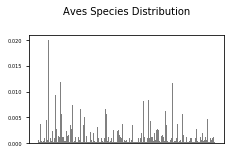

In [5]:
df = pd.read_csv('datasets/Aves.Cleaned.k1.csv')
plot_dist(df, 'Aves', 'aves_dist_new')

In [2]:
def plot_results(accuracies, error_df, y_error, save=False, filename='accuracies'):
    y_labels = ['Test Accuracy', 'Training Accuracy']
    fig, axes = plt.subplots(2, 1, figsize=(8, 14))
    for i in range(2):
        axes[i].plot([0, 1, 2, 3, 4, 5, 6], accuracies[i][0], marker='o', linestyle='-')
        axes[i].plot([0, 1, 2, 3, 4, 5, 6], accuracies[i][1], marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
        axes[i].plot([0, 1, 2, 3, 4, 5, 6], accuracies[i][2], marker='s', linestyle=(0, (1, 1)))
        sns.boxplot(x='k-mer', y=y_error[i], data=error_df[i], hue='model', ax=axes[i])
        axes[i].set_ylabel(y_labels[i])
        axes[i].set_xlabel('k-mer')
        axes[i].legend(loc='lower right')
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [3]:
def get_accuracy(data):
    mean_accs = {}
    for k in sorted(data):
        for model in data[k]: 
            mean_accs.setdefault(model, [])
            mean_accs[model].append(statistics.mean(data[k][model]) * 100)
    return mean_accs

In [4]:
def get_errors(data):
    error_scores = {}
    for k in data:
        for model in data[k]: 
            error_scores.setdefault(model, {})
            error_scores[model].setdefault(k, 0)
            error_scores[model][k] = data[k][model]
    return error_scores

In [8]:
def prepare_df(json):
    df_train = pd.DataFrame(columns=['Training Accuracy', 'model', 'k-mer'])
    df_test = pd.DataFrame(columns=['Test Accuracy', 'model', 'k-mer'])
    for model in sorted(json):
        if 'train' in model:
            for k in sorted(json[model]):
                for score in json[model][k]:
                    df_train.loc[len(df_train)] = [score*100, model[:-6], 'k=' + k[-1]]
        else:
            for k in sorted(json[model]):
                for score in json[model][k]:
                    df_test.loc[len(df_test)] = [score*100, model[:-5], 'k=' + k[-1]]
    return df_train, df_test

In [6]:
with open('scores_json/non-hierarchical acc score(plant+fungi).json', 'r') as fr:
    data = json.load(fr)
    polypod_results = get_accuracy(data['Polypodiopsida'])
    pucci_results = get_accuracy(data['Pucciniomycetes'])
    polypod_error = get_errors(data['Polypodiopsida'])
    pucci_error = get_errors(data['Pucciniomycetes'])

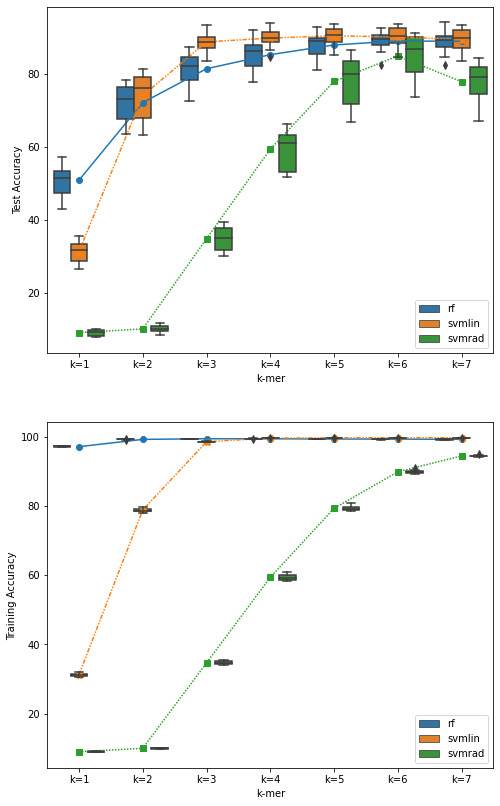

In [9]:
train, test = prepare_df(polypod_error)
acc_list = [[polypod_results['rf test'], polypod_results['svmlin test'], polypod_results['svmrad test']],
            [polypod_results['rf train'], polypod_results['svmlin train'], polypod_results['svmrad train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'polypodnew')

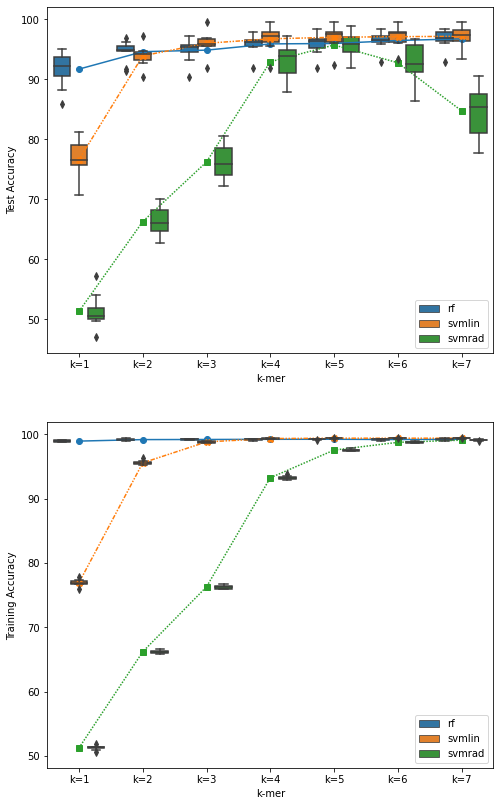

In [10]:
train, test = prepare_df(pucci_error)
acc_list = [[pucci_results['rf test'], pucci_results['svmlin test'], pucci_results['svmrad test']],
            [pucci_results['rf train'], pucci_results['svmlin train'], pucci_results['svmrad train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'puccinew')

In [10]:
with open('scores_json/non-hierarchical acc score.json', 'r') as fr:
    data = json.load(fr)
    chirop_results = get_accuracy(data['Chiroptera'])
    rodent_results = get_accuracy(data['Rodentia'])
    aves_results = get_accuracy(data['Aves'])
    chirop_error = get_errors(data['Chiroptera'])
    rodent_error = get_errors(data['Rodentia'])
    aves_error = get_errors(data['Aves'])

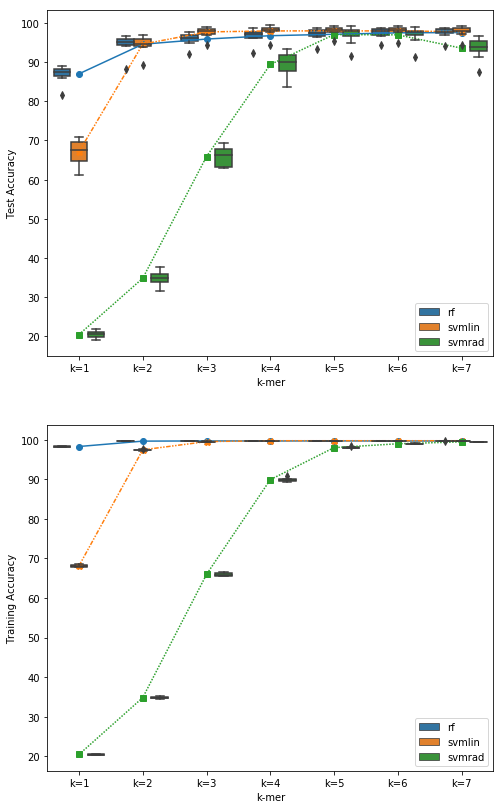

In [11]:
train, test = prepare_df(chirop_error)
acc_list = [[chirop_results['rf test'], chirop_results['svmlin test'], chirop_results['svmrad test']],
            [chirop_results['rf train'], chirop_results['svmlin train'], chirop_results['svmrad train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'chiropteranew')

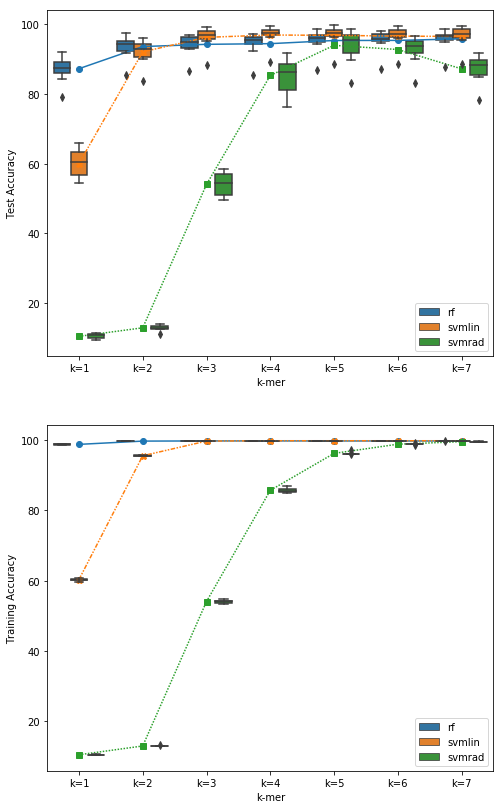

In [12]:
train, test = prepare_df(rodent_error)
acc_list = [[rodent_results['rf test'], rodent_results['svmlin test'], rodent_results['svmrad test']],
            [rodent_results['rf train'], rodent_results['svmlin train'], rodent_results['svmrad train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'rodentianew')

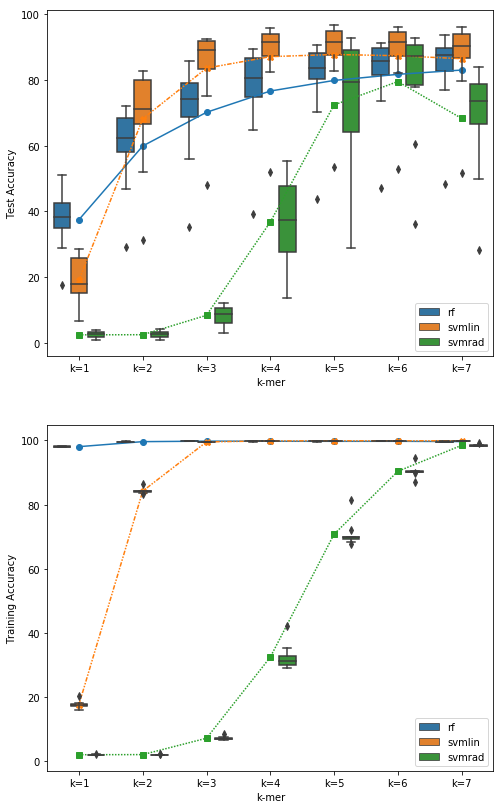

In [13]:
train, test = prepare_df(aves_error)
acc_list = [[aves_results['rf test'], aves_results['svmlin test'], aves_results['svmrad test']],
            [aves_results['rf train'], aves_results['svmlin train'], aves_results['svmrad train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'avesnew')

In [11]:
with open('hierarchical class acc.json', 'r') as fr:
    data = json.load(fr)
    class_acc = get_accuracy(data)
    class_error = get_errors(data)

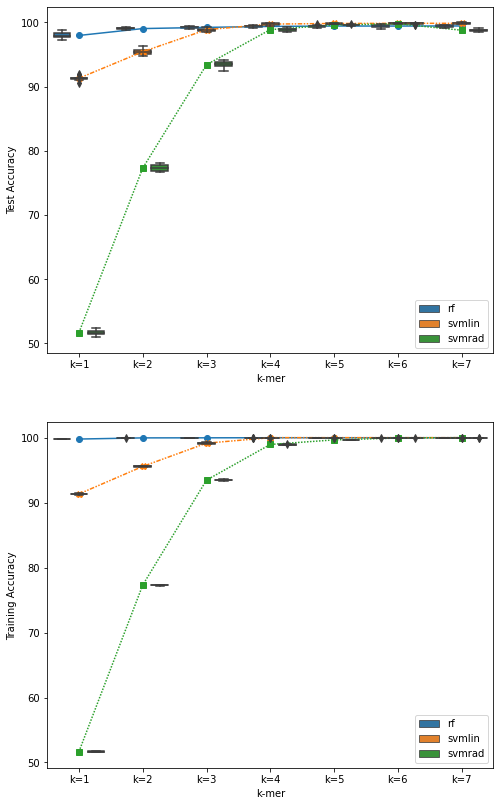

In [12]:
train, test = prepare_df(class_error)
acc_list = [[class_acc['rf test'], class_acc['svmlin test'], class_acc['svmrad test']],
            [class_acc['rf train'], class_acc['svmlin train'], class_acc['svmrad train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'taxonomicclassnew')

In [15]:
with open('scores_json/non-hierarchical merged.json', 'r') as fr:
    data = json.load(fr)
    merged_data = get_accuracy(data)
    merged_data_error = get_errors(data)

In [16]:
def plot_merged_data(train_df, test_df):
    fig = plt.figure(figsize=(8, 8))
    sns.boxplot(x='k-mer', y='Training Accuracy', data=train_df, hue='model')
    sns.boxplot(x='k-mer', y='Test Accuracy', data=test_df, hue='model', palette='Spectral')
    plt.plot([0,1, 2,3, 4, 5, 6], merged_data['rf train'], marker='o', linestyle='-')
    plt.plot([0,1, 2,3, 4, 5, 6], merged_data['rf test'], marker='s', linestyle=(0, (1, 1)), color='gold')
    plt.legend()
    plt.ylabel('Test and Training Accuracies')
    plt.savefig('allnew', bbox_inches='tight', dpi=300)
    plt.show()

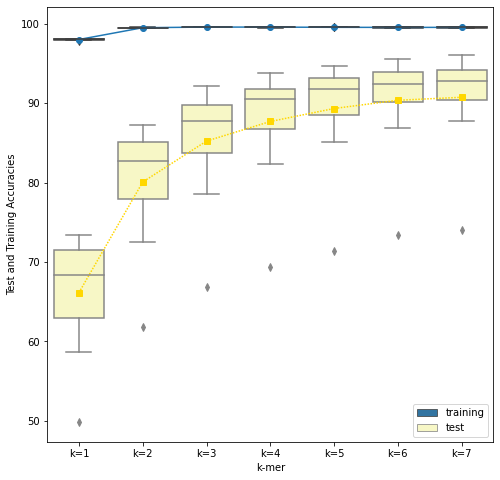

In [17]:
train, test = prepare_df(merged_data_error)
train['model'] = 'training'
test['model'] = 'test'
plot_merged_data(train, test)

In [46]:
with open('../scores/hierarchical_svm_5_data.json', 'r') as accuracy_scores:
    h_svm = json.load(accuracy_scores)
    h_svm_acc = get_accuracy(h_svm)
    h_svm_error = get_errors(h_svm)    

In [47]:
train_error, test_error = prepare_df(h_svm_error)

In [22]:
def plot_hierarchical_svm(train, test, train_error, test_error):
    model = train_error.pop('model')
    model = model.map({'rf': 'training'})
    train_error.insert(1, 'model', model)
    model = test_error.pop('model')
    model = model.map({'rf': 'test'})
    test_error.insert(1, 'model', model)    
    fig = plt.figure(figsize=(8, 8))
    sns.boxplot(x='k-mer', y='Training Accuracy', data=train_error, hue='model')
    sns.boxplot(x='k-mer', y='Test Accuracy', data=test_error, hue='model', palette='Spectral')
    plt.plot([0,1, 2,3, 4, 5, 6], train, marker='o', linestyle='-')
    plt.plot([0,1, 2,3, 4, 5, 6], test, marker='s', linestyle=(0, (1, 1)), color='gold')
    plt.legend(loc='lower right')
    plt.ylabel('Test and Training Accuracies')
    plt.savefig('hierarchicalrf', bbox_inches='tight', dpi=300)
    plt.show()

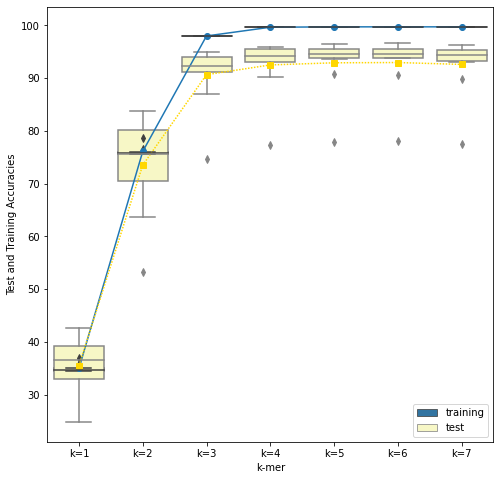

In [49]:
plot_hierarchical_svm(h_svm_acc['svm train'], h_svm_acc['svm test'], train_error, test_error)

In [23]:
with open('../scores/hierarchical_rf_5_data.json', 'r') as accuracy_scores:
    h_rf = json.load(accuracy_scores)
    h_rf_acc = get_accuracy(h_rf)
    h_rf_error = get_errors(h_rf)    

In [24]:
train_error, test_error = prepare_df(h_rf_error)

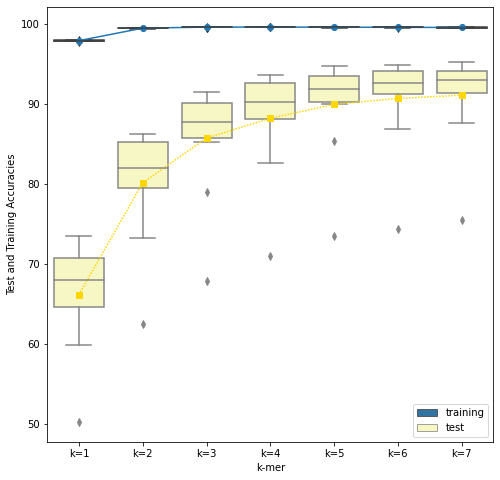

In [25]:
plot_hierarchical_svm(h_rf_acc['rf train'], h_rf_acc['rf test'], train_error, test_error)